Imports

In [1]:
# to get 3d plot to be rotatable (optional)
%matplotlib widget

In [2]:
import numpy as np
import umap
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from e_machine import distribution_generator, e_machine, weight_initialization, reservoir

Generating hidden states, inputs, reservoir states

In [3]:
# set parameters
sequence_length = 200
reservoir_size = 1

In [4]:
# generate hidden states and inputs
distribution = distribution_generator(num_states=6, num_outputs=2)
sigma, x = e_machine(states=["A", "B", "C", "D", "E", "F"], transition_matrix=distribution, n=sequence_length)

# initialize weights
W, v = weight_initialization(n=reservoir_size)

# initialize hidden state
h = []
h_t = np.zeros_like(v)
h.append(np.transpose(h_t).tolist()[0])

# pass data through reservoir
for x_t in x:
    h_t = reservoir(h_t, x_t, W, v)
    h.append(np.transpose(h_t).tolist()[0])

In [5]:
print(distribution)

[[0.00148488 0.02993129 0.03796512 0.22544491 0.0872893  0.00223119
  0.06319226 0.12386949 0.0710008  0.17652395 0.15127508 0.02979174]
 [0.04504987 0.05340357 0.00635937 0.24659327 0.05052905 0.00480458
  0.16698082 0.09416707 0.03279317 0.04296035 0.0957861  0.16057277]
 [0.02865765 0.12365815 0.03423176 0.05749001 0.14867547 0.18584593
  0.13914451 0.01147529 0.02821982 0.18699416 0.00896007 0.04664717]
 [0.02944204 0.07751298 0.10403104 0.21736542 0.28582095 0.02918655
  0.01211369 0.00552504 0.04647155 0.12728229 0.01929946 0.04594901]
 [0.37418685 0.07228033 0.1130049  0.01919217 0.05892109 0.03056919
  0.16432843 0.0596813  0.0746789  0.00396824 0.00934249 0.0198461 ]
 [0.03155735 0.04378549 0.15294724 0.00473108 0.06044502 0.09856403
  0.07361101 0.16241189 0.00860918 0.31485716 0.00323326 0.04524729]]


In [6]:
print(W)
print(v)

[[0.78889586]]
[[0.68623931]]


Linear Regression

Goal: use current reservoir state to predict next emission

In [ ]:
# Create a LinearRegression object
model = LinearRegression()

# Reshape emissions to a 2D array for sklearn
emissions_reshaped = np.array(x).reshape(-1, 1)
reservoir_states = h[1:]

# Train the model
model.fit(emissions_reshaped, reservoir_states)
r_squared = model.score(emissions_reshaped, reservoir_states)
print(f"R-squared: {r_squared}")

# model.fit(X, y)

R-squared: 0.6848984370236989


In [23]:
# Create a LinearRegression object
model = LinearRegression()

# Reshape emissions to a 2D array for sklearn
emissions_reshaped = np.array(x).reshape(-1, 1)
# print(emissions_reshaped)
# Train the model
model.fit(h[:-1], emissions_reshaped)
r_squared = model.score(h[:-1], emissions_reshaped)
print(f"R-squared: {r_squared}")

R-squared: 0.00024293769276162447


If reservoir state has dimension two, we can plot the two states and time with the points colored by state

In [8]:
ordered = {
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5
}

sigma_ordered = [ordered[i] for i in sigma]

In [9]:
if reservoir_size == 2:
    h_0 = [i[0] for i in h]
    h_1 = [i[1] for i in h]
    
    fig = plt.figure()
 
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
    
    # defining axes
    z = h_0
    y = h_1
    x_ = sigma_ordered

    ax.set_zlabel("First component of Reservoir state")
    ax.set_ylabel("Second component of reservoir state")
    ax.set_xlabel("Time")
    ax.scatter(range(len(h_0)), y, z, c=sigma_ordered)

    plt.show()

Dimensionality Reduction (If reservoir state has dimension greater than 1)

In [10]:
if reservoir_size > 1:
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=1, metric='euclidean')
    h = reducer.fit_transform(h)

Plotting hidden states in order

In [11]:
ordered = {
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5
}

sigma_ordered = [ordered[i] for i in sigma]

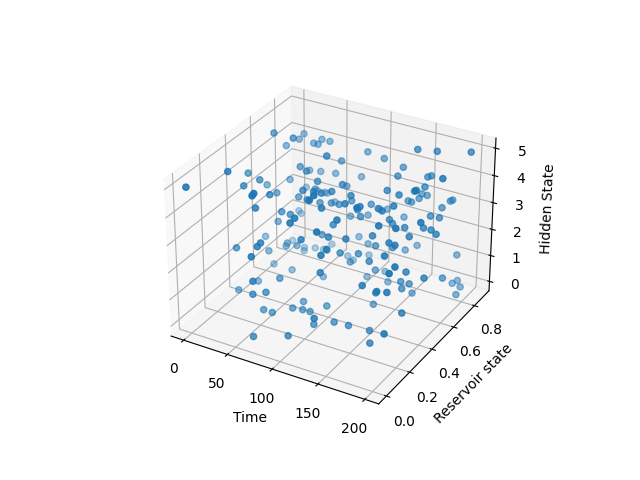

In [12]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = range(len(h))
y = h
z = sigma_ordered

ax.set_zlabel("Hidden State")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("Time")
ax.scatter(x_, y, z)#,c=sigma_ordered)

plt.show()

Plotting hidden states out of order

In [13]:
unordered = {
    "A" : 3,
    "B" : 4,
    "C" : 1,
    "D" : 0,
    "E" : 5,
    "F" : 2
}

sigma_unordered = [unordered[i] for i in sigma]

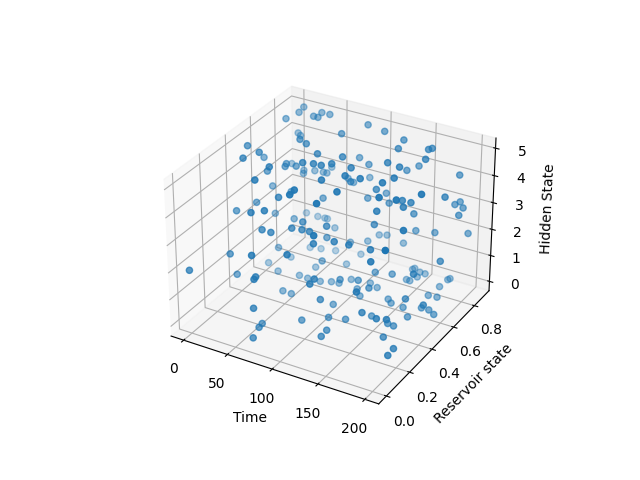

In [14]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = range(len(h))
y = h
z = sigma_unordered

ax.set_zlabel("Hidden State")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("Time")
ax.scatter(x_, y, z) #,c=sigma_ordered)

plt.show()

Plotting with hidden state as color

In [15]:
colors = {
    "A" : 'b',
    "B" : 'g',
    "C" : 'r',
    "D" : 'c',
    "E" : 'm',
    "F" : 'y'
}

sigma_colors = [colors[i] for i in sigma]

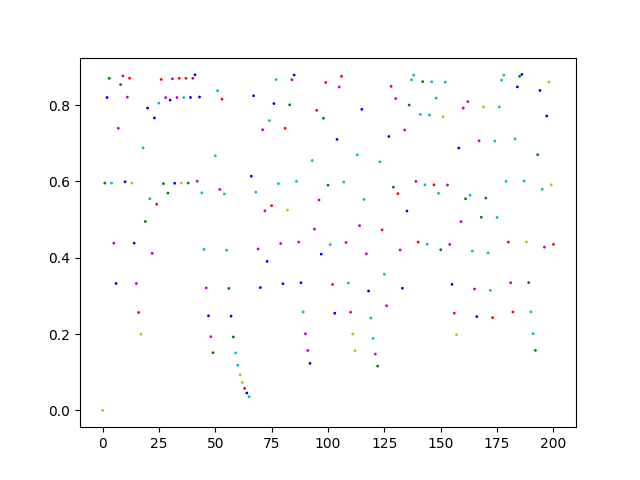

In [16]:
fig = plt.figure()
plt.scatter(range(len(h)), h, s=1, c=sigma_colors)
plt.show()

Colored by future emission (1 ahead)

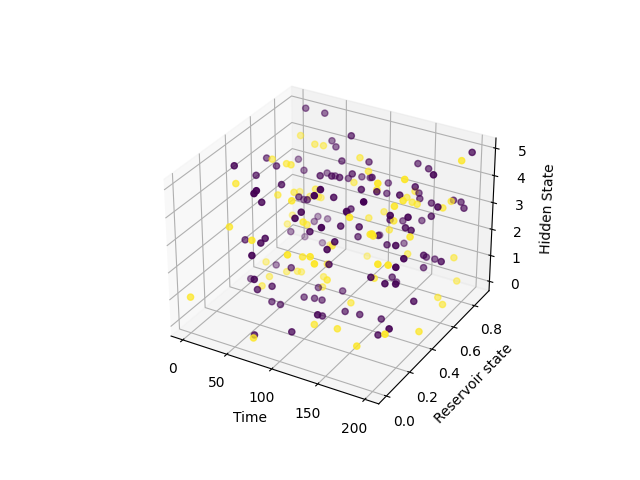

In [19]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = range(len(h))[1:]
y = h[:-1]
z = sigma_ordered[1:]

ax.set_zlabel("Hidden State")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("Time")
ax.scatter(x_, y, z, c=x)

plt.show()

colored by state

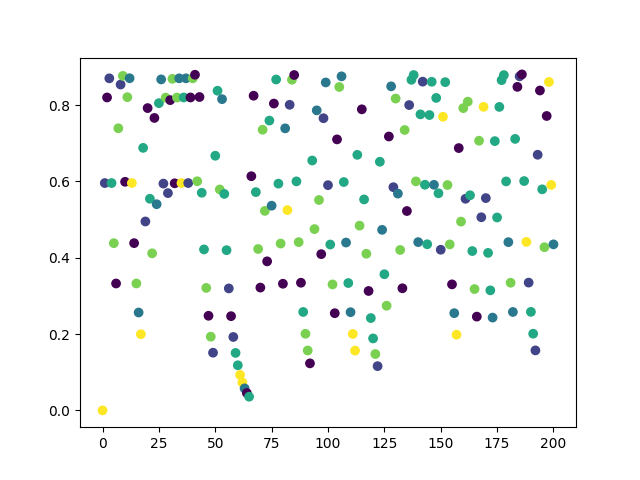

In [18]:
fig = plt.figure()
plt.scatter(range(len(h)), h, c=sigma_ordered)